In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from helpers.iaml01cw2_helpers import *

In [19]:
import pickle

In [20]:
Xtrn, Ytrn, Xtst, Ytst = load_FashionMNIST("fashionMNIST/")

In [21]:
# Copy original data
Xtrn_orig = Xtrn.copy()
Xtst_orig = Xtst.copy()

In [22]:
# Normalise dataset
Xtrn /= 255.0
Xtst /= 255.0

Xmean = np.mean(Xtrn, axis=0)
Xtrn_nm = Xtrn - Xmean
Xtst_nm = Xtst - Xmean

In [23]:
# 2.1
# logistic_reg = LogisticRegression().fit(Xtrn_nm, Ytrn)

In [24]:
# save the model to disk
filename_lr = 'finalized_lr_model.sav'
# pickle.dump(logistic_reg, open(f"saved_models/{filename_lr}", 'wb'))

In [25]:
# load the model from disk
loaded_lr_model = pickle.load(open(f"saved_models/{filename_lr}", 'rb'))

In [26]:
Ytst_nm_pred = loaded_lr_model.predict(Xtst_nm)

In [27]:
accuracy_score(Ytst, Ytst_nm_pred)

0.8401

In [28]:
confusion_matrix(Ytst, Ytst_nm_pred)

array([[819,   3,  15,  50,   7,   4,  89,   1,  12,   0],
       [  5, 953,   4,  27,   5,   0,   3,   1,   2,   0],
       [ 27,   4, 731,  11, 133,   0,  82,   2,   9,   1],
       [ 31,  15,  14, 866,  33,   0,  37,   0,   4,   0],
       [  0,   3, 115,  38, 760,   2,  72,   0,  10,   0],
       [  2,   0,   0,   1,   0, 911,   0,  56,  10,  20],
       [147,   3, 128,  46, 108,   0, 539,   0,  28,   1],
       [  0,   0,   0,   0,   0,  32,   0, 936,   1,  31],
       [  7,   1,   6,  11,   3,   7,  15,   5, 945,   0],
       [  0,   0,   0,   1,   0,  15,   1,  42,   0, 941]])

In [14]:
# 2.2
# svc_model = SVC(verbose=True).fit(Xtrn_nm, Ytrn)

In [29]:
filename_svc = 'finalized_svc_model.sav'
# pickle.dump(svc_model, open(f"saved_models/{filename_svc}", 'wb'))

In [30]:
# load the model from disk
loaded_svc_model = pickle.load(open(f"saved_models/{filename_svc}", 'rb'))

In [ ]:
Ytst_nm_pred_svc = loaded_svc_model.predict(Xtst_nm)

In [20]:
accuracy_score(Ytst, Ytst_nm_pred_svc)

0.8461

In [21]:
confusion_matrix(Ytst, Ytst_nm_pred_svc)

array([[845,   2,   8,  51,   4,   4,  72,   0,  14,   0],
       [  4, 951,   7,  31,   5,   0,   1,   0,   1,   0],
       [ 15,   2, 748,  11, 137,   0,  79,   0,   8,   0],
       [ 32,   6,  12, 881,  26,   0,  40,   0,   3,   0],
       [  1,   0,  98,  36, 775,   0,  86,   0,   4,   0],
       [  0,   0,   0,   1,   0, 914,   0,  57,   2,  26],
       [185,   1, 122,  39,  95,   0, 533,   0,  25,   0],
       [  0,   0,   0,   0,   0,  34,   0, 925,   0,  41],
       [  3,   1,   8,   5,   2,   4,  13,   4, 959,   1],
       [  0,   0,   0,   0,   0,  22,   0,  47,   1, 930]])

In [31]:
# Decision boundary plots
pca_2 = PCA(2)
Xtrn_nm_pca = pca_2.fit_transform(Xtrn_nm)

In [32]:
std1, std2 = np.std(Xtrn_nm_pca, axis=0)

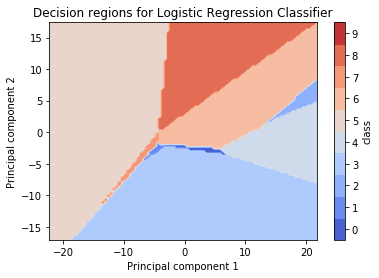

In [44]:
# 2.3
x = np.arange(-5*std1, 5*std1, std1 / 10) # shape: 100 x 2
y = np.arange(5*std2, -5*std2, -1*std2 / 10)
xx, yy = np.meshgrid(x, y)

z = np.vstack([xx.ravel(), yy.ravel()]).T # shape: 10000 x 2

proj_z = pca_2.inverse_transform(z) # transfrom to 784 features

Z = loaded_lr_model.predict(proj_z)
Z = Z.reshape(xx.shape)
levels = np.arange(11) - 0.5

plt.contourf(xx, yy, Z, cmap=plt.cm.get_cmap("coolwarm"), levels=levels)
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.title("Decision regions for Logistic Regression Classifier")
cbar = plt.colorbar(ticks=range(10), label='class')
plt.savefig("results/2_3.png")
plt.show()

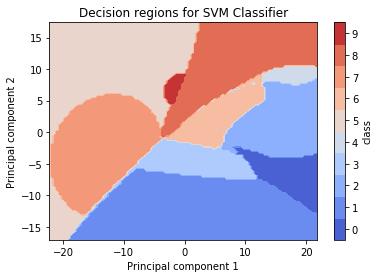

In [45]:
# 2.4
x = np.arange(-5*std1, 5*std1, std1 / 10)
y = np.arange(5*std2, -5*std2, -1*std2 / 10 )
xx, yy = np.meshgrid(x, y)

z = np.vstack([xx.ravel(), yy.ravel()]).T

proj_z = pca_2.inverse_transform(z)

Z = loaded_svc_model.predict(proj_z)
Z = Z.reshape(xx.shape)
levels = np.arange(11) - 0.5

plt.contourf(xx, yy, Z, cmap=plt.cm.get_cmap("coolwarm"), levels=levels)
plt.xlabel("Principal component 1")
plt.ylabel("Principal component 2")
plt.title("Decision regions for SVM Classifier")
plt.colorbar(ticks=range(10), label='class')
plt.savefig("results/2_4.png")
plt.show()

In [112]:
# 2.5
Xsmall = None
Ysmall = None

for i in range(10):
    mask = Ytrn == i
    x_vals = Xtrn_nm[mask][:1000]
    y_vals = Ytrn[mask][:1000]
    
    if Xsmall is None:
        Xsmall = x_vals
        Ysmall = y_vals
    else:
        Xsmall = np.concatenate((Xsmall, x_vals), axis=0)
        Ysmall = np.concatenate((Ysmall, y_vals), axis=None)

In [144]:
c_vals = np.logspace(-2, 3, num=10)
params_dict = {
    "C": c_vals
}
grid = GridSearchCV(SVC(), params_dict, return_train_score=True)

In [145]:
grid.fit(Xsmall, Ysmall)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 3.59381e-02, 1.29155e-01, 4.64159e-01, 1.66810e+00,
       5.99484e+00, 2.15443e+01, 7.74264e+01, 2.78256e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [7]:
filename_grid = "gridsearchmodel.sav"
# pickle.dump(grid, open(filename_grid, 'wb'))

In [8]:
# load the model from disk
loaded_grid_model = pickle.load(open(filename_grid, 'rb'))

In [149]:
mean_accuracies = loaded_grid_model.cv_results_["mean_test_score"]

In [153]:
mean_accuracies

array([0.6482, 0.6911, 0.7367, 0.7838, 0.8197, 0.8447, 0.8565, 0.8542,
       0.8495, 0.8406])

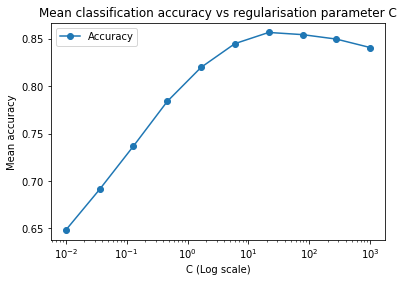

In [162]:
plt.plot(c_vals, mean_accuracies, 'o-', label="Accuracy")
plt.xscale('log')
plt.title("Mean classification accuracy vs regularisation parameter C")
plt.xlabel("C (Log scale)")
plt.ylabel("Mean accuracy")
plt.legend()
plt.savefig("results/2_5.png")
plt.show()

In [9]:
# 2.6
best_C = loaded_grid_model.best_params_["C"]
improved_svc_model = SVC(C=best_C).fit(Xtrn_nm, Ytrn)

In [10]:
filename_impr_svc = "improvedsvc.sav"
pickle.dump(improved_svc_model, open(filename_impr_svc, 'wb'))

In [11]:
# load the model from disk
loaded_impr_svc_model = pickle.load(open(filename_impr_svc, 'rb'))

In [12]:
loaded_impr_svc_model.score(Xtrn_nm, Ytrn)

0.9084166666666667

In [13]:
loaded_impr_svc_model.score(Xtst_nm, Ytst)

0.8765